# Modelling Simulation and Optimization

Name: Mrunali Govind More

Student ID: x18189059 

MSc in Data Analytics

National College of Ireland

Email ID: x18189059@student.ncirl.ie

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc">
<ul class="toc-item">
<li><span><a href="#Load-Libraries" data-toc-modified-id="Load Libraries 1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Libraries</a></span></li>
<li><span><a href="#Data-Preparation" data-toc-modified-id="Data Preparation 2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Preparation</a></span>
<ul class="toc-item">
<li><span><a href="#Given-Data" data-toc-modified-id="Given Data 1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Given Data</a></span></li>
<li><span><a href="#Max-Velocity" data-toc-modified-id="Max Velocity 2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Max Velocity</a></span></li>
<li><span><a href="#Travelling-Time" data-toc-modified-id="Travelling Time 3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Travelling Time</a></span></li>
<li><span><a href="#Number-of-Signalling-Block" data-toc-modified-id="Number of Signalling Blocks 4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Number of Signalling Blocks</a></span></li>
<li><span><a href="#Data-Frame" data-toc-modified-id="Data Frame 5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Data Frame</a></span></li></ul>
</li>
<li><span><a href="# Simulation" data-toc-modified-id="Simulation"><span class="toc-item-num">3&nbsp;&nbsp;</span>Simulation</a></span></li>
<ul class="toc-item">
<li><span><a href="#Poisson-Distribution" data-toc-modified-id="Poisson Distribution"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Poisson Distribution</a></span></li>
<li><span><a href="#Travelling-Time" data-toc-modified-id="Travelling Time 3"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Travelling Time</a></span></li>
<li><span><a href="#Trains" data-toc-modified-id="Trains"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Trains</a></span></li></ul>
</li>
<li><span><a href="#Optimization" data-toc-modified-id="Optimization"><span class="toc-item-num">4&nbsp;&nbsp;</span>Optimization</a></span></li> 
<ul class="toc-item">
<li><span><a href="#Train-Statistics" data-toc-modified-id="Train Statistics"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Train Statistics</a></span></li>
<li><span><a href="#Stats-Array-Generation-for-Monte-Carlo-Optimization-Function" data-toc-modified-id="Stats Array Generation for Monte Carlo Optimization Function"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Stats Array Generation for Monte Carlo Optimization Function</a></span></li>
<li><span><a href="#Setting-Contour-Graph-limits-for-the-Monte-Carlo-Optimization-Function" data-toc-modified-id="Setting Contour Graph limits for the Monte Carlo Optimization Function"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Setting Contour Graph limits for the Monte Carlo Optimization Function</a></span></li>
<li><span><a href="#Monte-Carlo-Optimization-Function" data-toc-modified-id="Monte Carlo Optimization Function"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Monte Carlo Optimization Function</a></span></li>
<li><span><a href="#Minimizing-Overall-Average-Travelling-Time" data-toc-modified-id="Minimizing Overall Average Travelling Time"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Minimizing Overall Average Travelling Time</a></span></li>
<li><span><a href="#Maximizing-the-throughput-of-passengers-in-peak-hours" data-toc-modified-id="Maximizing the throughput of passengers in peak hours"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Maximizing the throughput of passengers in peak hours</a></span></li></ul></li>
<li><span><a href="#References" data-toc-modified-id="References"><span class="toc-item-num">5&nbsp;&nbsp;</span>References</a></span></li>

</ul></div>

# Load Libraries

In [0]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats
from datetime import datetime
from scipy.stats import expon
import math
from math import floor
import numpy as np
!pip install simpy
import simpy
import simpy.events as evt

# Data Preparation

## Given Parameters




In [0]:
# Checking Given Parameters
#
print('\nCheck the speed, acceleration, distance and time calculations')
# acceleration of 0.72m/s2
acc_rate = 0.72

# emergency braking at 2.5m/s2
emergency_brake = 2.5

# energy optimal deceleration (using regenerative braking) is 0.36m/s2
dec_rate = 0.36

# maximum travelling speed of the train is about 300km/h (83.3m/s)
max_speed_kph = 300

max_speed_mps = (max_speed_kph * 1000) / (60 * 60)
print('Max speed %s km/hr in metres / sec : %s' % (max_speed_kph, round(max_speed_mps, 2)))

# accelerating from 0 to the maximum speed takes therefore 115.7s during which time the train travels about 4,820m
max_speed_acc_time = max_speed_mps / acc_rate
print('Max speed acceleration time in seconds : %s' % round(max_speed_acc_time, 2))

max_speed_acc_dist = 0.5 * acc_rate * max_speed_acc_time * max_speed_acc_time
print('Max speed acceleration distance in metres : %s' % round(max_speed_acc_dist, 2))

# slow decelerating takes 231.4s and the distance travelled is 9,640m.
max_speed_dec_time = max_speed_mps / dec_rate
print('Max speed deceleration time in seconds : %s' % round(max_speed_dec_time, 2))

max_speed_dec_dist = 0.5 * dec_rate * max_speed_dec_time * max_speed_dec_time
print('Max speed deceleration distance in metres : %s' % round(max_speed_dec_dist, 2))

# emergency braking
max_speed_emergency_brake_time = max_speed_mps / emergency_brake
print('Max speed emergency brake time in seconds : %s' % round(max_speed_emergency_brake_time, 2))

max_speed_emergency_brake_dist = 0.5 * emergency_brake * max_speed_emergency_brake_time * max_speed_emergency_brake_time
print('Max speed emergency brake distance in metres : %s' % round(max_speed_emergency_brake_dist, 2))

# The length of a pre signal block should therefore be at least 10km, but to allow a train to achieve
# and run as long as possible at full speed, the block length should be at least 1.5x this length.
signalling_block_dist = 15000
london_old_oak_common_birmingham_interchange_dist = 145000


Check the speed, acceleration, distance and time calculations
Max speed 300 km/hr in metres / sec : 83.33
Max speed acceleration time in seconds : 115.74
Max speed acceleration distance in metres : 4822.53
Max speed deceleration time in seconds : 231.48
Max speed deceleration distance in metres : 9645.06
Max speed emergency brake time in seconds : 33.33
Max speed emergency brake distance in metres : 1388.89


## Max Velocity


Accelaration is done from standing position for a certain amount of time at maximum velocity and then decelarate from maximum velocity to standstill position. This happen within a certain distance which is the signalling block length.

$v_{max} = at_a$ where a is the constant acceleration rate, $t_a$ is the time spent accelerating therefore
$t_a = \frac{v_{max}}{a}$

$v_{max} = dt_d$ where d is the constant acceleration rate, $t_d$ is the time spent decelerating therefore
$t_d = \frac{v_{max}}{d}$

$dist = dist_a + dist_d$ where $dist_a$ is the distance travelled accelerating and $dist_d$ is the distance
travelled decelerating

$dist = \frac{1}{2}a{t_a^2} + \frac{1}{2}d{t_d^2}$

$dist = \frac{1}{2}a{(\frac{v_{max}}{a})^2} + \frac{1}{2}d{(\frac{v_{max}}{d})^2}$

$v_{max} = \sqrt\frac{2dist}{(\frac{1}{a} + \frac{1}{d})}$



In [0]:
# The max velocity achievable over a distance assuming a standing start, constant acceleration to that max velocity
# and then a constant deceleration to a full stop within the distance specified - note that the 300km/hr max
# operating speed is not taken into account
def max_velocity_over_distance(distance):
    """
    :param distance: distance, meters
    :return: maximum velocity achievable in distance
    """

    return math.sqrt((2 * distance) / ((1 / acc_rate) + (1 / dec_rate)))

sig_block_max_velocity = max_velocity_over_distance(signalling_block_dist)
print('Max velocity achieved over signalling block of %s metres : %s m/s'
      % (signalling_block_dist, round(sig_block_max_velocity, 2)))


No_sig_block_max_velocity = max_velocity_over_distance(10000)
print('Max velocity achieved over signalling block of %s metres : %s m/s'
      % (10000, round(No_sig_block_max_velocity, 2)))



Max velocity achieved over signalling block of 15000 metres : 84.85 m/s
Max velocity achieved over signalling block of 10000 metres : 69.28 m/s


## Travelling Time

In [0]:
# The time to travel the distance specified assuming a standing start, constant acceleration to that max velocity
# time spent travelling at max velocity and then a constant deceleration to a full stop within the distance specified
def time_to_travel_distance(max_velocity, distance):
    """
    :param max_velocity: maximum velocity, m/s
    :param distance: distance, metres
    :return: time in seconds required to travel distance
    """

    acc_time = max_velocity/acc_rate
    acc_distance = 0.5 * acc_rate * acc_time * acc_time

    dec_time = max_velocity/dec_rate
    dec_distance = 0.5 * dec_rate * dec_time * dec_time

    if (acc_distance + dec_distance) > distance:
        achievable_velocity = max_velocity_over_distance(distance)
        return (achievable_velocity/acc_rate) + (achievable_velocity/dec_rate)
    else:
        return acc_time + dec_time + (distance - (acc_distance + dec_distance))/max_velocity

# Check the time required to travel the length of a signalling block from a standing start to full stop

sig_block_time = time_to_travel_distance(sig_block_max_velocity, signalling_block_dist)
sig_block_time_mins = sig_block_time/60
print('Time required to travel a single signalling block (standing start to full stop) of %s metres : %s seconds'
      % (signalling_block_dist, round(sig_block_time, 2)))
print('Time required to travel a single signalling block (standing start to full stop) of %s metres : %s minutes'
      % (signalling_block_dist, round(sig_block_time_mins, 2)))

sig_block_time = time_to_travel_distance(No_sig_block_max_velocity, 10000)
sig_block_time_mins = sig_block_time/60
print('Time required to travel a single signalling block (standing start to full stop) of %s metres : %s seconds'
      % (10000, round(sig_block_time, 2)))
print('Time required to travel a single signalling block (standing start to full stop) of %s metres : %s minutes'
      % (10000, round(sig_block_time_mins, 2)))

# Check the time required to travel LONDON OLD OAK COMMON - BIRMINGHAM INTERCHANGE from a standing start to full stop

print('\nValidate if calculated times to travel given distance is correct by finding time required by train from LONDON OLD OAK COMMON - BIRMINGHAM INTERCHANGE ')
longest_seg_time = time_to_travel_distance(max_speed_mps, london_old_oak_common_birmingham_interchange_dist)
print('Time from LONDON OLD OAK COMMON - BIRMINGHAM INTERCHANGE %s seconds' % round(longest_seg_time, 2))
print('Time from LONDON OLD OAK COMMON - BIRMINGHAM INTERCHANGE %s minutes' % round(longest_seg_time/60, 2)) 

Time required to travel a single signalling block (standing start to full stop) of 15000 metres : 353.55 seconds
Time required to travel a single signalling block (standing start to full stop) of 15000 metres : 5.89 minutes
Time required to travel a single signalling block (standing start to full stop) of 10000 metres : 288.68 seconds
Time required to travel a single signalling block (standing start to full stop) of 10000 metres : 4.81 minutes

Validate if calculated times to travel given distance is correct by finding time required by train from LONDON OLD OAK COMMON - BIRMINGHAM INTERCHANGE 
Time from LONDON OLD OAK COMMON - BIRMINGHAM INTERCHANGE 1913.61 seconds
Time from LONDON OLD OAK COMMON - BIRMINGHAM INTERCHANGE 31.89 minutes


## Number of Siganalling Blocks

In [0]:
# finding number of signal and pre signal blocks required

block_num = floor(london_old_oak_common_birmingham_interchange_dist/(signalling_block_dist))

block_num

9

## Data Frame


As we can see, time required to cover 15000 meters distance is 5.89 (approx 5 minutes) minutes and time required to cover 10000 meters distance is 4.81 minutes (approx 4 minutes). From this we can say that,

* Distance between stations London Euston and London Old Oak Common is 15000 meters (15kms) (5 mins)
* Distance between stations Birmingham Interchange and Birmingham Curzon Street is 25000 meters (25kms) (9 min = 5 mins + 4 mins)

Also, distance between stations London Euston and London Old Oak Common is divided into one signalling block, distance between London Old Oak Common to Birmingham Interchange is divided into 9 signalling blocks, distance between stations Birmingham Interchange and Birmingham Curzon is divided into one signalling block and 


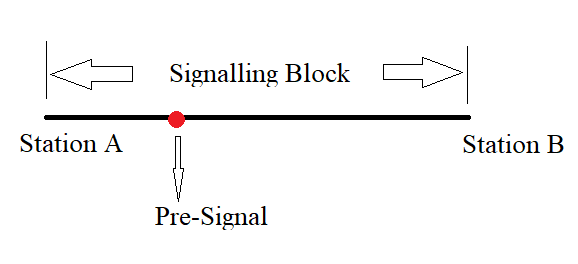

Total distance of signalling block should be more than or equal to 15000 meters for the train to travel at maximum speed. Pre-signal is places 10000 meters before the end of signalling block.

In [0]:
df1 = pd.DataFrame(columns=['Line','From','To','Distance','Type'])

In [0]:
df1['From'] = ['London Euston','PreSignal1','London Old Oak Common','PreSignal2','Signal1','PreSignal3','Signal2','PreSignal4','Signal3','PreSignal5','Signal4',
               'PreSignal6','Signal5','PreSignal7','Signal6','PreSignal8','Signal7','PreSignal9','Signal8','PreSignal10','Birmingham Interchange','PreSignal11']
df1['To'] = ['PreSignal1','London Old Oak Common','PreSignal2','Signal1','PreSignal3','Signal2','PreSignal4','Signal3','PreSignal5','Signal4','PreSignal6','Signal5',
             'PreSignal7','Signal6','PreSignal8','Signal7','PreSignal9','Signal8','PreSignal10','Birmingham Interchange','PreSignal11','Birmingham Curzon Street']
df1['Type'] = ['PS','SB','PS','SB','PS','SB','PS','SB','PS','SB','PS','SB','PS','SB','PS','SB','PS','SB','PS','SB','PS','SB']
df1['Distance'] = [5000,10000,6111,10000,6111,10000,6111,10000,6111,10000,6111,10000,6111,10000,6111,10000,6111,10000,6111,10000,15000,10000]
df1.loc[: , 'Line'] = 'HS2'

In [0]:
df1

,Line,From,To,Distance,Type
0,HS2,London Euston,PreSignal1,5000,PS
1,HS2,PreSignal1,London Old Oak Common,10000,SB
2,HS2,London Old Oak Common,PreSignal2,6111,PS
3,HS2,PreSignal2,Signal1,10000,SB
4,HS2,Signal1,PreSignal3,6111,PS
5,HS2,PreSignal3,Signal2,10000,SB
6,HS2,Signal2,PreSignal4,6111,PS
7,HS2,PreSignal4,Signal3,10000,SB
8,HS2,Signal3,PreSignal5,6111,PS
9,HS2,PreSignal5,Signal4,10000,SB


# Simulation

## Poisson Distribution

In [0]:
#
# Assume a Poisson distribution on the number of passengers arriving for each train based on an hourly rate
#
def gen_stop_time(
        first_stop,
        last_stop,
        no_pass_per_hr,
        trains_per_hr=10,
        train_len=200,
        train_capacity=420,
        train_occ=0.7,
        embark_rate=1.0
):
    """
    :param first_stop: whether the station is the first stop on the line
    :param last_stop: whether the station is the last stop on the line
    :param no_pass_per_hr: the number of passengers per hour
    :param trains_per_hr: the number of trains per hour
    :param train_len: the total length of the train
    :param train_capacity: the train capacity in terms of passengers
    :param train_occ: the train occupancy rate
    :param embark_rate: the number of passengers embarking/disembarking per second at a stop
    :return: the total wait time in minutes
    """
    num_passengers_on = 0

    # Assume each carriage is 20m
    carriage_len = 20
    no_of_carriages = floor(train_len/carriage_len)

    if first_stop:
        num_passengers_on = floor(train_capacity * train_occ)

    if first_stop or last_stop:
        total_wait_time = (((train_capacity * train_occ) / no_of_carriages) * embark_rate)
    else:
        num_passengers_on = np.random.poisson(lam=no_pass_per_hr/trains_per_hr)
        num_passengers_off = np.random.poisson(lam=no_pass_per_hr/trains_per_hr)

        free_space = (train_capacity - floor(train_capacity * train_occ)) + num_passengers_off
        if free_space < num_passengers_on:
            num_passengers_on = free_space

        time_passengers_off = num_passengers_off/no_of_carriages * embark_rate

        time_passengers_on = num_passengers_on/no_of_carriages * embark_rate

        total_wait_time = (time_passengers_off + time_passengers_on)
        
    t1 = expon(loc=total_wait_time, scale=total_wait_time * 0.3).rvs()
    return t1, num_passengers_on

## Travelling Time

In [0]:
# The Train travels the Signalling Block and the travel time depends on whether it is
# accelerating, travelling at max velocity or decelerating. There are fixed times specified between the first two and
# last two stations
def gen_travel_time(is_acc_block, is_dec_block, fixed_time, signalling_block_dist):
    """
    :param is_acc_block: whether the Network Node is an acceleration block i.e. first Signalling Block after a Station
    :param is_dec_block: whether the Network Node is an deceleration block i.e. last Signalling Block before a Station
    :param fixed_time: whether the Network Node is a Signalling Block with a fixed transit time
    :return: the actual journey time predicted by a Normal distribution
    """
    if fixed_time is not None:
        journey_time = (signalling_block_dist/max_speed_mps)
    elif is_acc_block:
        journey_time = acc_block_time()
    elif is_dec_block:
        journey_time = dec_block_time()

    # The assumption is made that using the variability in journey time below accounts for minor delays and weather
    # The assumption is also made that major incidents will cause unrecoverable delays and are hence not modelled for
    # the purposes of optimisation
    actual_journey_time = expon(loc=journey_time, scale=journey_time * 0.1).rvs()
    return actual_journey_time


# Calculate the time taken to transit an acceleration Signalling Block
def acc_block_time():
    start_block_time = max_speed_acc_time + (signalling_block_dist - max_speed_acc_dist) / max_speed_mps
    return start_block_time


# Calculate the time taken to transit an deceleration Signalling Block
def dec_block_time():
    end_block_time = max_speed_dec_time + (signalling_block_dist - max_speed_dec_dist) / max_speed_mps
    return end_block_time

In [0]:
dt = df1

dt

,Line,From,To,Distance,Type
0,HS2,London Euston,PreSignal1,5000,PS
1,HS2,PreSignal1,London Old Oak Common,10000,SB
2,HS2,London Old Oak Common,PreSignal2,6111,PS
3,HS2,PreSignal2,Signal1,10000,SB
4,HS2,Signal1,PreSignal3,6111,PS
5,HS2,PreSignal3,Signal2,10000,SB
6,HS2,Signal2,PreSignal4,6111,PS
7,HS2,PreSignal4,Signal3,10000,SB
8,HS2,Signal3,PreSignal5,6111,PS
9,HS2,PreSignal5,Signal4,10000,SB


## Trains

In [0]:
class Train(object): 

    def __init__(self, i, line, route,stats, num_pass_hr = 4000):
        self.name = '[Train '+f"{i:2d}"+']'
        self.line=line
        self.route = route
        self.dwelltime = 0
        self.num_pass_hr = num_pass_hr
        stats = stats

    def process(self):
        here = self.route[0]   # starting location
        stop_signal = 'red'
        go_signal = 'green'
        num_pass = 0
        start = None
        for dest in self.route[1:]:
            data=dt[dt['Line']==self.line][dt['From']==here]
            blocktype = data['Type'].item()
            distance = data['Distance'].item()
            
            # The train is currently in station 'here'. The next station is 'dest'.

            ## find dwell time and passenger count when train stops or leave the station
            if here == 'London Euston':
                first_stop = True
            else:
                first_stop = False
            if dest == 'Birmingham Curzon Street':
                last_stop = True
            else:
                last_stop = False

            if here == 'London Euston' or here == 'London Old Oak Common' or here == 'Birmingham Interchange': 
                self.dwelltime, passenger = gen_stop_time(first_stop, last_stop, no_pass_per_hr = self.num_pass_hr)
                num_pass += passenger
                print(f'Total number of passengers on {self.name:s} are ',passenger)
                yield env.timeout(self.dwelltime)
            
            # train departed
            print(f"{now():s} {self.name:s} dep from {here:s} for {dest:s}")
            
            if start == None:
                start = now()
                name = self.name

            # Signalling block information and signal color
            if blocktype == 'PS':
                print(f"{self.name:s} entering in signal block and entrance signal is ",stop_signal)
            elif blocktype == 'SB':
                print(f"Pre-signal is ",stop_signal)

            ## finding drive time
            is_acc_block = False
            fixed_time = None
            is_dec_block = False
            if here == 'London Euston' or here == 'London Old Oak Common' or here == 'Birmingham Interchange': 
                is_acc_block = True # when train is leaving station it will accelerate
            elif dest == 'London Old Oak Common' or dest == 'Birmingham Interchange' or dest == 'Birmingham Curzon Street	':
                is_dec_block = True # when station is next stop train will deccelerate
            else:
                fixed_time = True # when train is travelling in block at maximum speed
 
            drivetime = gen_travel_time(is_acc_block, is_dec_block, fixed_time, distance)
            yield env.timeout(drivetime)
            
            here=dest

            #train arrived
            print(f"{now():s} {self.name:s} arr {here:s}")

            # Signalling block information and signal color    
            if blocktype == 'SB':
                yield env.timeout(5)
                print(f"{self.name:s} is out of block and presignal and entrance signal is ",go_signal)

        # to store the statistics of train    
        end = now()
        FMT = '%H:%M:%S'
        total = datetime.strptime(end, FMT) - datetime.strptime(start, FMT)
        stats[name] = (start, end, total.seconds, num_pass)              


def line(name='HS2', start=6*3600, stop=7*3600, timing=360):
    data=dt[dt['Line']==name]
    stations=data['From'].to_list()
    stations+=[data['To'].to_list()[-1]]
    yield env.timeout(start-env.now) # the line starts operating at 6am
    for i in range(int((stop-start)/timing)):
        t=Train(i, name, stations, stats)
        env.process(t.process())
        yield env.timeout(timing)
        
# time        
def daytime(t):
    t=int(t)
    return f"{t//3600:02d}:{(t%3600)//60:02d}:{t%60:02d}"
def now():
    return daytime(env.now)

# running the simulation
env = simpy.Environment()
stats = {}
env.process(line())
env.run()

Total number of passengers on [Train  0] are  294
06:00:53 [Train  0] dep from London Euston for PreSignal1
[Train  0] entering in signal block and entrance signal is  red
06:04:58 [Train  0] arr PreSignal1
06:04:58 [Train  0] dep from PreSignal1 for London Old Oak Common
Pre-signal is  red
Total number of passengers on [Train  1] are  294
06:06:31 [Train  1] dep from London Euston for PreSignal1
[Train  1] entering in signal block and entrance signal is  red
06:10:54 [Train  0] arr London Old Oak Common
06:10:57 [Train  1] arr PreSignal1
06:10:57 [Train  1] dep from PreSignal1 for London Old Oak Common
Pre-signal is  red
[Train  0] is out of block and presignal and entrance signal is  green
Total number of passengers on [Train  0] are  394
Total number of passengers on [Train  2] are  294
06:12:42 [Train  2] dep from London Euston for PreSignal1
[Train  2] entering in signal block and entrance signal is  red
06:12:50 [Train  0] dep from London Old Oak Common for PreSignal2
[Train  0] 

# Optimization

## Train Statistics

In [0]:
print('Train Number: (Start Time, End Time, Total Travel Time(Seconds),Total number of passengers)')
stats

Train Number: (Start Time, End Time, Total Travel Time(Seconds),Total number of passengers)


{'[Train  0]': ('06:00:53', '07:01:29', 3636, 1081),
 '[Train  1]': ('06:06:31', '07:05:24', 3533, 1085),
 '[Train  2]': ('06:12:42', '07:11:07', 3505, 1122),
 '[Train  3]': ('06:18:31', '07:18:44', 3613, 1068),
 '[Train  4]': ('06:24:30', '07:24:01', 3571, 1042),
 '[Train  5]': ('06:30:48', '07:29:30', 3522, 1083),
 '[Train  6]': ('06:36:36', '07:34:59', 3503, 1121),
 '[Train  7]': ('06:42:38', '07:42:39', 3601, 1118),
 '[Train  8]': ('06:48:29', '07:47:36', 3547, 1065),
 '[Train  9]': ('06:54:38', '07:52:05', 3447, 1112)}

## Stats Array Generation for Monte Carlo Optimization Function

The data obtained from simulation function obtained on particular number of trains, travelling time of each train and passenger count is stored in array

In [0]:
time = []
ppl = []

# Run the simulation and gather the stats for journey for each block length by number of trains in dataframes below
for k in range(15): # 15 = total size of block
    t=[]
    p = []
    stats = {}
    env = simpy.Environment()
    env.process(line())
    env.run()
    data = list(stats.items())
    for i in range(len(data)):
        t.append(data[i][1][2])
        p.append(data[i][1][3])
    time.append(t)
    ppl.append(p)

time1 = np.array(time)
ppl1 = np.array(ppl)

Streaming output truncated to the last 5000 lines.
Total number of passengers on [Train  4] are  426
07:14:44 [Train  9] arr Signal2
[Train  9] is out of block and presignal and entrance signal is  green
07:14:49 [Train  9] dep from Signal2 for PreSignal4
[Train  9] entering in signal block and entrance signal is  red
07:15:03 [Train  8] arr Signal3
[Train  8] is out of block and presignal and entrance signal is  green
07:15:08 [Train  8] dep from Signal3 for PreSignal5
[Train  8] entering in signal block and entrance signal is  red
07:15:23 [Train  7] arr Signal5
[Train  7] is out of block and presignal and entrance signal is  green
07:15:28 [Train  7] dep from Signal5 for PreSignal7
[Train  7] entering in signal block and entrance signal is  red
07:15:32 [Train  6] arr PreSignal8
07:15:32 [Train  6] dep from PreSignal8 for Signal7
Pre-signal is  red
07:15:50 [Train  4] dep from Birmingham Interchange for PreSignal11
[Train  4] entering in signal block and entrance signal is  red
07:1

In [0]:
def f(stats_array, x, y):
    """
    :param stats_array: An array of values for which an optimum is sought
    :param x: the x axis of the array i.e. columns
    :param y: the y axis of the array i.e. rows
    :return: the value at position x, y
    """
    return stats_array[x-1][y-1]

## Setting Contour Graph limits for the Monte Carlo Optimization Function

In [0]:
import random
# Set the graph limits
x_min = 1
x_max = 15 # distance of block
y_min = 1
y_max = 10 #total number of trains

#
# Set the random seed to different values to observe different behaviours
#
random.seed(630)

## Monte Carlo Optimization Function

In [0]:
def monte_carlo(title, opt_stats_arr, xmin, xmax, ymin, ymax, n): 
# optimization using monte carlo function. 
#The inputs to this optimization function are from dataframe from simulation block.
    """
    :param title: The title of the graph
    :param opt_stats_arr: the array containing the values for which an optimum is sought
    :param xmin: the minimum x value of the grid
    :param xmax: the maximum x value of the grid
    :param ymin: the minimum y value of the grid
    :param ymax: the maximum y value of the grid
    :param n: the number of attempts/hops to make to find an optimum value
    :return: the number of hops taken, the (x,y) location of the optimum value and the optimum value itself
    """
    x = [random.randint(xmin, xmax) for i in range(n)]
    y = [random.randint(ymin, ymax) for i in range(n)]

    xp = [x[0]]
    yp = [y[0]]

    fmin = f(opt_stats_arr, x[0], y[0])

    for i in range(1, len(x)):
        fi = f(opt_stats_arr, x[i], y[i])

        if fi < fmin:
            xp += [x[i]]
            yp += [y[i]]
            fmin = fi

    xs = np.linspace(xmin, xmax, xmax)
    ys = np.linspace(ymin, ymax, ymax)

    fig, ax = plt.subplots(1, 1)
    fig.set_figwidth(6)
    fig.set_figheight(5)

    cs = ax.contourf(xs, ys, opt_stats_arr.T, 10)
    fig.colorbar(cs, ax=ax)

    ax.scatter(x, y, c='red', marker='.')
    ax.plot(xp, yp, c='red', lw=1)
    ax.plot(xp[-1], yp[-1], marker='X', c='yellow')

    ax.set_title(title % n)
    ax.set_xlabel('Length of Signalling Blocks (km)')
    ax.set_ylabel('Number of Trains')

    plt.show()

    ret_val = len(xp), xp[-1], round(f(opt_stats_arr, xp[-1], yp[-1]), 2)
    print('hops: %s, k=%s, optimal metric=%s' % ret_val)
    return ret_val

## Minimizing Overall Average Travelling Time

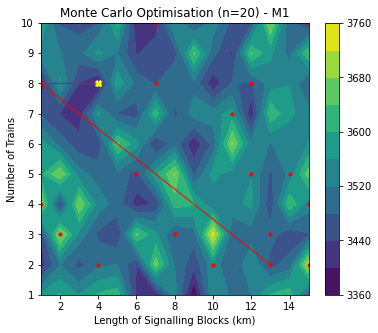

hops: 3, k=4, optimal metric=3389


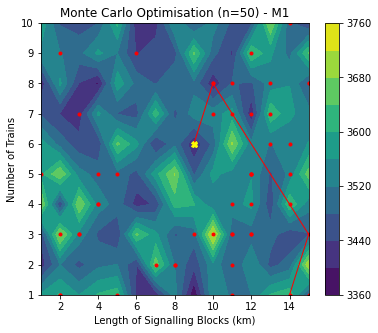

hops: 4, k=9, optimal metric=3407


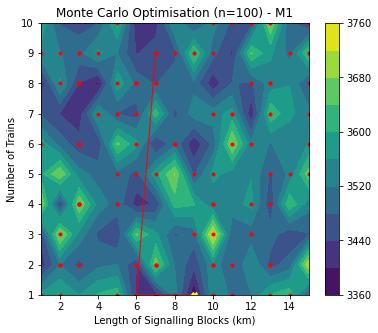

hops: 4, k=9, optimal metric=3365


(4, 9, 3365)

In [0]:
# The overall traveling time is optimized (minimized) as seen in the below figures which is calculated from the waiting time for
# the next train and the actual traveling time until arrival of the train. Three cases for the number of iterations which are 20, 50 and 100 are considered.

monte_carlo('Monte Carlo Optimisation (n=%s) - M1',
            time1, x_min, x_max, y_min, y_max, 20)
monte_carlo('Monte Carlo Optimisation (n=%s) - M1',
            time1, x_min, x_max, y_min, y_max, 50)
monte_carlo('Monte Carlo Optimisation (n=%s) - M1',
            time1, x_min, x_max, y_min, y_max, 100)

# In fig, optimal metric gives the optimal time for the given number of iterations

## Maximise the throughput of passengers in peak hours

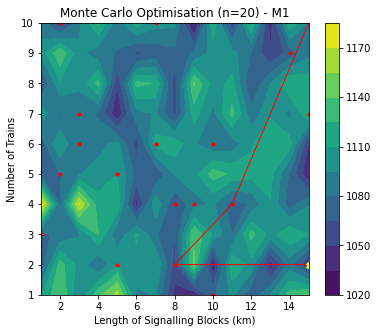

hops: 4, k=15, optimal metric=1048


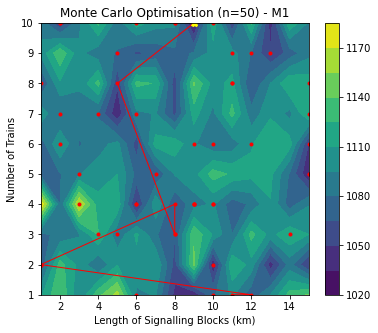

hops: 7, k=9, optimal metric=1029


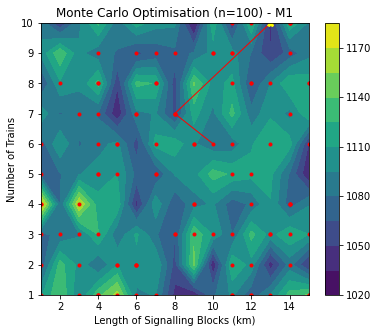

hops: 3, k=13, optimal metric=1042


(3, 13, 1042)

In [0]:
# The throughput of passengers during peak hours has been optimized (maximized) as seen in the below figuers. Three cases for the number  
# of iterations which are 20, 50 and 100 are considered.

monte_carlo('Monte Carlo Optimisation (n=%s) - M1',
            ppl1, x_min, x_max, y_min, y_max, 20)
monte_carlo('Monte Carlo Optimisation (n=%s) - M1',
            ppl1, x_min, x_max, y_min, y_max, 50)
monte_carlo('Monte Carlo Optimisation (n=%s) - M1',
            ppl1, x_min, x_max, y_min, y_max, 100)

# In fig, optimal metric gives the optimal passenger count for the given number of iterations

# References

[1] L. Dai, ‘A machine learning approach for optimisation in railway planning’, 2018, Available: https://repository.tudelft.nl/islandora/object/uuid%3A20170a8c-7e1e-434f-b5d6-9ba933e2ab6e [Accessed 07 05 2020]

[2] A. Lecchini, W. Glover, J. Lygeros and J. Maciejowski, "Monte Carlo optimisation for conflict resolution in air traffic control," Lecture Notes in Control and Information Sciences, no. 337, p. 257–276, 2006.

[3] I. A. Hansen, ‘Station capacity and stability of train operations’, Computers in Railways VII, vol. 7, pp. 809–816, Jan. 2000

[4] Y. H. Chang, C. H. Yeh and C. C. Shen, "A multiobjective model for passenger train services planning: application to Taiwan's high-speed rail line," Transportation Research Part B: Methodological, vol. 34, no. 2, pp. 91-106, 2000.

[5] P. Connor, ‘High Speed Railway Capacity - Understanding the factors affecting capacity limits for a high speed railway' Available: http://www.railway-technical.com/books-papers--articles/high-speed-railway-capacity.pdf

[6] T. Weise, "Global Optimization Algorithms–Theory and Application," [Online]. Available: http://www.it-weise.de/projects/book.pdf. [Accessed May 2020].

[7] H. Pouryousef, P. Lautala, and T. White, ‘Railroad capacity tools and methodologies in the U.S. and Europe’, Journal of Modern Transportation, vol. 23, Mar. 2015, doi: 10.1007/s40534-015-0069-z

[8] A. B. Downey, "Green Tree Press, Modeling and Simulation in Python," [Online]. Available: http://greenteapress.com/modsimpy/ModSimPy3.pdf. [Accessed May 2020].

[9] L. Dai, ‘A machine learning approach for optimisation in railway planning’, 2018, Available: https://repository.tudelft.nl/islandora/object/uuid%3A20170a8c-7e1e-434f-b5d6-9ba933e2ab6e [Accessed 07 05 2020].

[10] N. C. O. Ireland, "Modelling, Simulation and Optimization," [Online]. Available: https://moodle.ncirl.ie/course/view.php?id=1395. [Accessed 07 05 2020].

[11] Y. H. Chang, C. H. Yeh and C. C. Shen, "A multiobjective model for passenger train services planning: application to Taiwan's high-speed rail line," Transportation Research Part B: Methodological, vol. 34, no. 2, pp. 91-106, 2000.

[12] A. University, "Physics Formula Sheet," [Online]. Available: https://www.andrews.edu/~rwright/physics/Physics%20Formula%20Sheet.pdf. [Accessed April 2020].